In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

In [68]:
def plot_fft(y,title=None):
    """
    Plot fft for a given signal
    
    Adapted from: https://plot.ly/matplotlib/fft/
    """
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/fs
    frq = k/T # two sides frequency range
    frq = frq[:n//2] # one side frequency range

    Y = np.fft.fft(y)/(n/2) # fft computing and normalization
    Y = Y[:n//2]

    fig, ax = plt.subplots(2, 1, figsize=(15,4))

    time_lim = max(y)*1.1
    time_lim = 1 if time_lim < 1 else time_lim
    ax[0].plot(t,y, scaley=False)
    ax[0].set_xlabel('Time')
    ax[0].set_ylim([-time_lim, time_lim])
    ax[0].set_ylabel('Amplitude')
    if title:
        ax[0].set_title(title)

    freq_lim = max(abs(Y))*1.1
    freq_lim = 1 if freq_lim < 1 else freq_lim
    ax[1].plot(frq,abs(Y),'r', scaley=False) # plotting the spectrum
    ax[1].set_ylim([0, freq_lim])
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|')

In [7]:
data = np.random.rand(50, 1000)

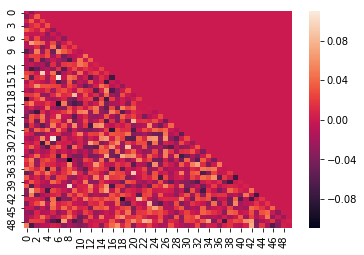

In [13]:
a = np.corrcoef(data)
a = np.tril(a, 1)
np.fill_diagonal(a, 0)

ax = sns.heatmap(a)
plt.show()

In [55]:
# Correlated indexes
p_idxs = np.argwhere(a > 0.1)
n_idxs = np.argwhere(a < -0.1)

idxs = np.append(p_idxs, n_idxs, axis=0)
channels_idxs = np.unique(idxs)
channels_idxs

array([ 5,  6,  8, 15, 29, 34, 40])

In [60]:
selected_channels = np.array([data[idx] for idx in channels_idxs])

In [65]:
mean_signal = sum(selected_channels)

/home/yu/venvs/dsp/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


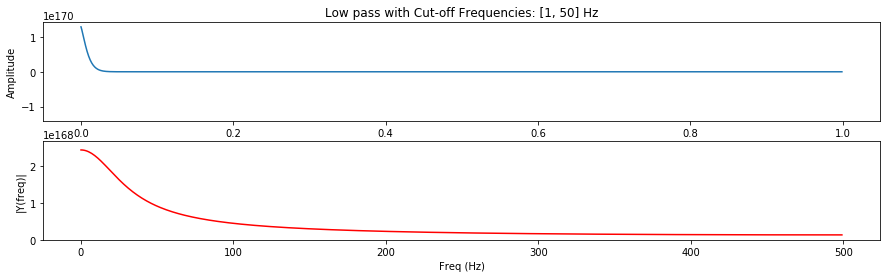

In [70]:
seconds = 1
fs = 1000
t = np.arange(0, seconds, 1.0/fs)
filter_order = 10

# Cut-off frequencies
fcs = [1, 50]

w = [fc/(fs / 2) for fc in fcs]# Normalize the frequency
b, a = signal.butter(filter_order, w, 'bandpass')
output = signal.filtfilt(b, a, mean_signal)
plot_fft(output, f'Low pass with Cut-off Frequencies: {fcs} Hz')